In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [276]:
#Rotten Tomatoes datasets
rot_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
#rot_ratings = pd.read_csv('zippedData/rt.reviews.tsv.gz')

#imdb datasets
imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
#imdb_title_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_titles = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

#box office mojo
bojo_gross = pd.read_csv('zippedData/bom.movie_gross.csv')

#the movied data base
tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [ ]:
#joining

# Objective #1: Which genres of movie have the highest rating?


## Visual #1: IMDB Highest Rated Movie Genres

In [277]:
#For first analysis, I am going to combine the imdb titles and ratings datasets. 
# Sort by last five years and then create a scatterplot. 

#setting indexes to 'tconst' for each dataset
imdb_titles.set_index('tconst', inplace=True)
imdb_ratings.set_index('tconst', inplace=True)

In [278]:
#joining dfs using inner join to get movies that contain both titles and ratings
imdb_titles_ratings = imdb_titles.join(imdb_ratings, how='inner')


In [7]:
imdb_titles_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt0063540 to tt9916160
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73856 non-null  object 
 1   original_title   73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB


In [8]:
#filters data so that it is only movies from 2018 & 2019 with more than 100 reviews
recent_ratings = imdb_titles_ratings[(imdb_titles_ratings['start_year'] >= 2010)
                                    & (imdb_titles_ratings['numvotes'] >= 100)]


In [9]:
genre_types = recent_ratings['genres'].value_counts()
genres_df = pd.DataFrame(genre_types)
genres_df.reset_index(inplace=True)
genres_df = genres_df.rename(columns={'index': 'genre', 'genres': 'movie_count'})

In [10]:
#Creates a list of top 25 genres with goal of filtering data so that it includes
# top 25 genres with 50 or more reviews from 2018 and 2019
top_25_genres = genres_df.iloc[:25]
top_25_genres

,genre,movie_count
0,Drama,3964
1,Comedy,2338
2,Documentary,1785
3,"Comedy,Drama",1378
4,Horror,857
5,"Drama,Romance",810
6,"Comedy,Romance",749
7,"Comedy,Drama,Romance",698
8,"Horror,Thriller",608
9,Thriller,548


In [11]:
#See if group_by works to filter by genre in larger dataset
filt = recent_ratings['genres'].isin(top_25_genres['genre'])
top_25_genres_ratings = recent_ratings[filt]
top_25_genres_ratings[['primary_title', 'genres', 'averagerating', 'numvotes']]

,primary_title,genres,averagerating,numvotes
tconst,,,,
tt0069049,The Other Side of the Wind,Drama,6.9,4517
tt0137204,Joe Finds Grace,"Adventure,Animation,Comedy",8.1,263
tt0146592,Pál Adrienn,Drama,6.8,451
tt0162942,Children of the Green Dragon,Drama,6.9,120
tt0250404,Godfather,"Crime,Drama",6.7,236
...,...,...,...,...
tt9903716,Jessie,"Horror,Thriller",8.5,100
tt9904844,Ott Tänak: The Movie,Documentary,8.7,218
tt9905412,Ottam,Drama,8.1,505


In [12]:
#Final database that only includes movies in the top 25 genres since 2018 with more than 50 votes
top_25_genres_ratings = top_25_genres_ratings.groupby('genres').mean()
top_25_genres_ratings.sort_values(by='averagerating', ascending=False, inplace=True)
top_25_genres_ratings = top_25_genres_ratings[['averagerating', 'numvotes']]
top_25_genres_ratings

,averagerating,numvotes
genres,,
"Documentary,Music",7.252941,2047.684492
Documentary,7.021289,896.056583
Drama,6.320787,2062.817608
"Crime,Drama",6.280556,11843.099206
"Drama,Romance",6.208519,6814.198765
"Comedy,Drama",6.141800,4660.356313
"Comedy,Drama,Romance",6.064613,10960.329513
"Adventure,Animation,Comedy",6.021134,44770.587629
"Crime,Drama,Thriller",5.950000,10827.219355


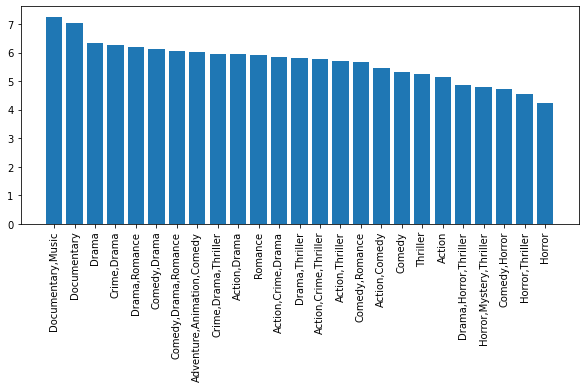

In [13]:
fig, ax = plt.subplots(figsize=(10,4))

average_rating = top_25_genres_ratings['averagerating']

ax.bar(top_25_genres_ratings.index, average_rating.values)

ax.tick_params(axis='x', labelrotation=90)


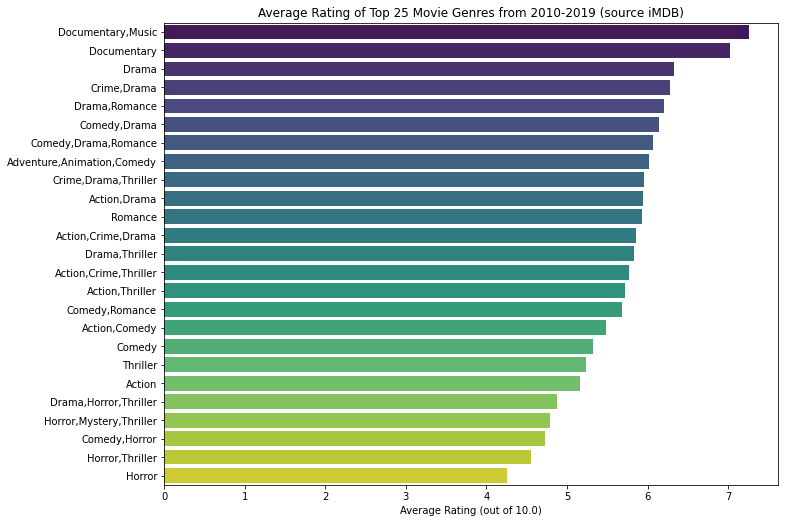

In [14]:
#x-variable for ease of use
average_rating = top_25_genres_ratings['averagerating']

#pallete preparation
#sns.color_palette(palette='viridis', n_colors=25, as_cmap=True)

ax = sns.barplot(y=top_25_genres_ratings.index, x=average_rating, palette='viridis')
#color palletes i like: 'viridis'

ax.get_figure().set_size_inches((11, 8.5))
ax.set_xlabel('Average Rating (out of 10.0)')
ax.set_ylabel(ylabel=None)
ax.set_title("Average Rating of Top 25 Movie Genres from 2010-2019 (source iMDB)");

### Possible Seaborn Palletes: 

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

## Visual #2: Rotten Tomatoes Top Rated Movie Genres

In [15]:
rot_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [16]:
#extracting relevant df columns
rot_info1 = rot_info[['id', 'genre', 'theater_date']]
#Setting index to movie id to allow for joining with review dataset
rot_info1.set_index('id', inplace=True)

In [17]:
#consulted slack, code below allows gzip file to be compressed and read
df_reviews = pd.read_csv('zippedData/rt.reviews.tsv', delimiter='\t', encoding='iso-8859-1')
#, compression='gzip'

In [18]:
rt_reviews = df_reviews[['id', 'rating', 'fresh']]
rt_reviews.set_index('id', inplace=True)

In [19]:
#executing left join so that all the reviews are included to corresponding movie ids
rt_reviews_info = rt_reviews.join(rot_info1, how='left')
rt_reviews_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 3 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rating        40915 non-null  object
 1   fresh         54432 non-null  object
 2   genre         54345 non-null  object
 3   theater_date  53206 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


In [20]:
#filter results further, so that it only includes movies released since 2010
#requires a map method to remove everything but the four digits of the year of release

#Deciding to drop the data that doesn't have any data attached. Dropped data accounts
#for 3% of total data at this point of cleaning
rt_reviews_info.dropna(subset=['theater_date'], inplace=True)

#creates new column that only includes the year
rt_reviews_info['year_release'] = rt_reviews_info['theater_date'].map(lambda x: x[-4:])

#changes the column from objects into ints
rt_reviews_info['year_release'] = pd.to_numeric(rt_reviews_info['year_release'])
rt_reviews_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53206 entries, 3 to 2000
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rating        40015 non-null  object
 1   fresh         53206 non-null  object
 2   genre         53206 non-null  object
 3   theater_date  53206 non-null  object
 4   year_release  53206 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.4+ MB


In [21]:
#now filtering the data by years from 2010 onward
filt = (rt_reviews_info['year_release'] >= 2010)
recent_rt_reviews = rt_reviews_info.loc[filt].copy()

recent_rt_reviews.head()

,rating,fresh,genre,theater_date,year_release
id,,,,,
3,3/5,fresh,Drama|Science Fiction and Fantasy,"Aug 17, 2012",2012
3,NaN,rotten,Drama|Science Fiction and Fantasy,"Aug 17, 2012",2012
3,NaN,fresh,Drama|Science Fiction and Fantasy,"Aug 17, 2012",2012
3,NaN,fresh,Drama|Science Fiction and Fantasy,"Aug 17, 2012",2012
3,NaN,fresh,Drama|Science Fiction and Fantasy,"Aug 17, 2012",2012


In [22]:
#there is no standard rating system besides the fresh or rotten rating.
#so, my plan is to change the 'fresh' into 1 and 'rotten' into 0 and then find the
#average of each movie

recent_rt_reviews['fresh_numeric'] = recent_rt_reviews['fresh'].map(lambda x: 1 if x == 'fresh' else 0)

#recent_rt_reviews.loc[recent_rt_reviews.fresh] = recent_rt_reviews.fresh.map(lambda x: 1 if x == 'fresh' else 0)

In [23]:
recent_rt_reviews

,rating,fresh,genre,theater_date,year_release,fresh_numeric
id,,,,,,
3,3/5,fresh,Drama|Science Fiction and Fantasy,"Aug 17, 2012",2012,1
3,NaN,rotten,Drama|Science Fiction and Fantasy,"Aug 17, 2012",2012,0
3,NaN,fresh,Drama|Science Fiction and Fantasy,"Aug 17, 2012",2012,1
3,NaN,fresh,Drama|Science Fiction and Fantasy,"Aug 17, 2012",2012,1
3,NaN,fresh,Drama|Science Fiction and Fantasy,"Aug 17, 2012",2012,1
...,...,...,...,...,...,...
1976,NaN,fresh,Action and Adventure|Art House and International,"Feb 17, 2016",2016,1
1981,3/5,fresh,Comedy|Drama,"Oct 5, 2012",2012,1
1981,NaN,fresh,Comedy|Drama,"Oct 5, 2012",2012,1


In [24]:
# reviews_genre_mean = recent_rt_reviews.groupby('genre').mean().copy()
# reviews_genre_mean.reset_index(inplace=True)
# reviews_genre_mean

In [25]:
rt_top_25_genres = pd.DataFrame(recent_rt_reviews['genre'].value_counts())
rt_top_25_genres = rt_top_25_genres.iloc[:25]
rt_top_25_genres.reset_index(inplace=True)

rt_top_25_genres

,index,genre
0,Drama,4094
1,Comedy|Drama,1678
2,Comedy,1618
3,Drama|Mystery and Suspense,1076
4,Drama|Romance,740
5,Comedy|Drama|Romance,528
6,Comedy|Romance,524
7,Horror,455
8,Action and Adventure|Mystery and Suspense,432
9,Action and Adventure|Science Fiction and Fantasy,432


In [26]:
filt = recent_rt_reviews['genre'].isin(rt_top_25_genres['index'])
rt_top_25_genres_ratings = recent_rt_reviews.loc[filt]

rt_top_25 = rt_top_25_genres_ratings.groupby('genre').mean('fresh_numeric')

#rt_top_25_genres_ratings.sort_values(by='fresh_numeric', ascending=False, inplace=True)

In [27]:
rt_top_25.sort_values(by='fresh_numeric', ascending=False, inplace=True)

In [28]:
rt_top_25

,year_release,fresh_numeric
genre,,
Drama|Horror,2017.000000,0.878505
Action and Adventure|Animation|Kids and Family,2011.000000,0.870270
Drama|Romance,2016.382432,0.854054
Animation|Comedy,2016.000000,0.821622
Art House and International|Drama|Romance,2017.000000,0.797297
Action and Adventure|Drama|Mystery and Suspense,2011.000000,0.769697
Drama|Mystery and Suspense,2013.005576,0.744424
Action and Adventure|Mystery and Suspense,2011.212963,0.717593
Action and Adventure|Comedy|Kids and Family,2018.000000,0.716346


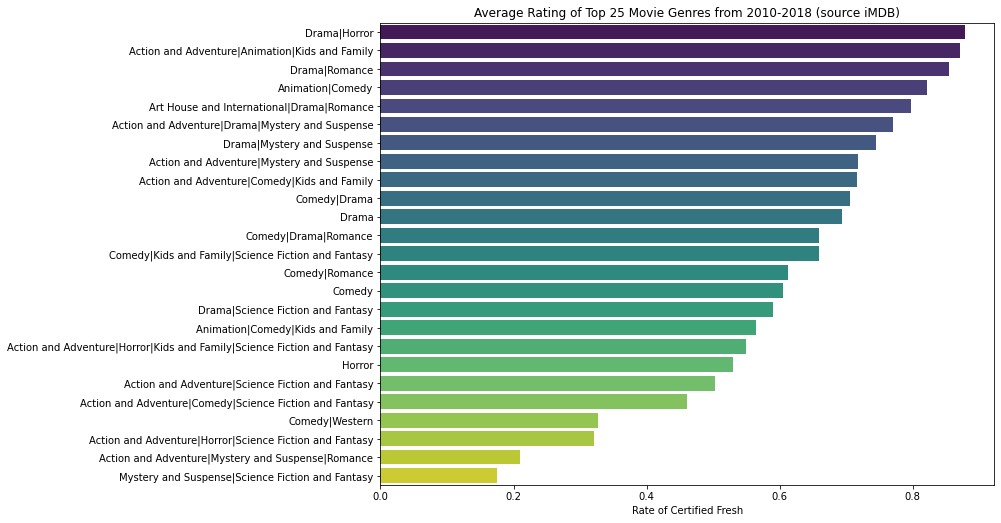

In [29]:
#x-variable for ease of use
rt_average_rating = rt_top_25['fresh_numeric']

#pallete preparation
#sns.color_palette(palette='viridis', n_colors=25, as_cmap=True)

ax = sns.barplot(y=rt_top_25.index, x=rt_average_rating, palette='viridis')
#color palletes i like: 'viridis'

ax.get_figure().set_size_inches((11, 8.5))
ax.set_xlabel('Rate of Certified Fresh')
ax.set_ylabel(ylabel=None)
ax.set_title("Average Rating of Top 25 Movie Genres from 2010-2018 (source iMDB)");

# Objective #2: What movies/ types of movies are most successful and gross the most money?

## Top 25 Grossing Films Visual (BoJo)

In [30]:
top_gross = bojo_gross.sort_values(by='domestic_gross', ascending=False)[:25].copy()


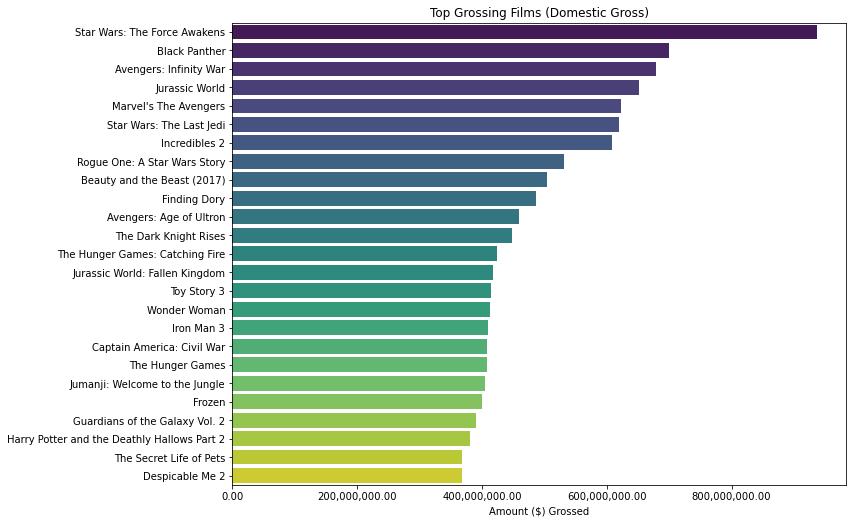

In [286]:
#x-variable for ease of use
dom_gross_amount = top_gross['domestic_gross']

titles = top_gross['title']

#pallete preparation
#sns.color_palette(palette='viridis', n_colors=25, as_cmap=True)

ax1 = sns.barplot(y=titles, x=dom_gross_amount, palette='viridis')
#color palletes i like: 'viridis'

ax1.get_figure().set_size_inches((11, 8.5))
ax1.set_xlabel('Amount ($) Grossed')
ax1.xaxis.set_major_formatter("{x:,.2f}")
ax1.set_ylabel(ylabel=None)
ax1.set_title("Top Grossing Films (Domestic Gross)");

## Top 25 Movies (ratings and popularity) visuals (TMDB)

In [329]:
popular_movies = tmdb.sort_values(by='popularity', ascending=False)[:25].copy()

tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


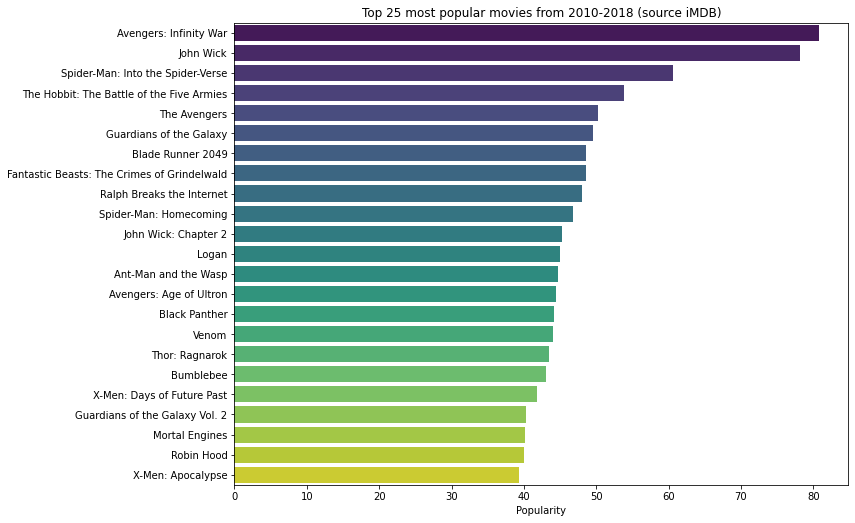

In [288]:
#x-variable for ease of use
tmdb_ratings = popular_movies['vote_average']
tmdb_popularity = popular_movies['popularity']
titles = popular_movies['original_title']

#pallete preparation
#sns.color_palette(palette='viridis', n_colors=25, as_cmap=True)

ax1 = sns.barplot(y=titles, x=tmdb_popularity, palette = 'viridis')
#color palletes i like: 'viridis'

ax1.get_figure().set_size_inches((11, 8.5))
ax1.set_xlabel('Popularity')
ax1.set_ylabel(ylabel=None)
ax1.set_title("Top 25 most popular movies from 2010-2018 (source iMDB)");

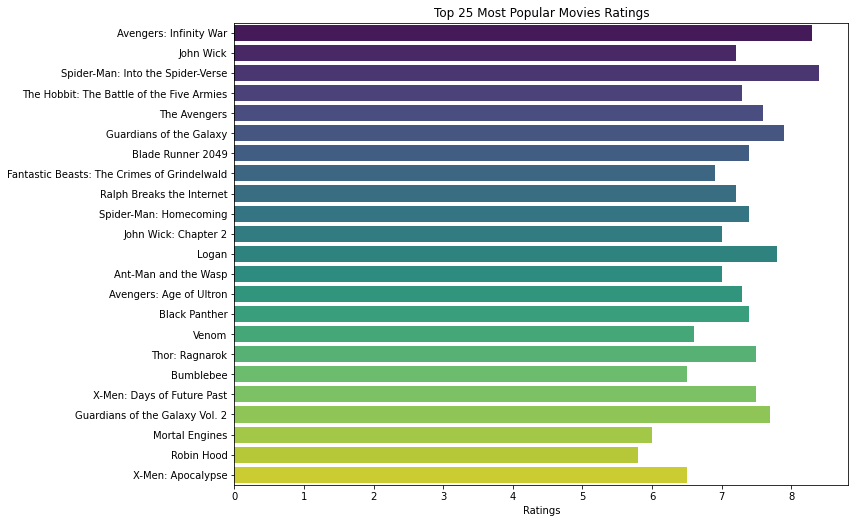

In [34]:
ax2 = sns.barplot(y=titles, x=tmdb_ratings, palette='viridis')
#color palletes i like: 'viridis'

ax2.get_figure().set_size_inches((11, 8.5))
ax2.set_xlabel('Ratings')
ax2.set_ylabel(ylabel=None)
ax2.set_title("Top 25 Most Popular Movies Ratings");

## Combing Popularity/Ratings and Domestic Gross

In [289]:
#Setting both indexes to title
bojo_cpy = bojo_gross.set_index('title').copy()
tmdb_cpy = tmdb.set_index('title').copy()
#using inner join to see which films to allow graphing relation between ratings/popularity
#and domestic gross
joined_dfs = bojo_cpy.join(tmdb_cpy, how='inner')

In [290]:
bojo_tmdb = joined_dfs[['domestic_gross', 'year', 'popularity', 'vote_average', 
                        'vote_count']].copy()

#2703 movie 'survived' the inner join 
bojo_tmdb.info()



<class 'pandas.core.frame.DataFrame'>
Index: 2703 entries, '71 to mother!
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   domestic_gross  2682 non-null   float64
 1   year            2703 non-null   int64  
 2   popularity      2703 non-null   float64
 3   vote_average    2703 non-null   float64
 4   vote_count      2703 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 126.7+ KB


In [291]:
filt = (bojo_tmdb['popularity'] > 1) & (bojo_tmdb['vote_count'] > 100) & (bojo_tmdb['domestic_gross'] > 1000000)
bojo_tmdb = bojo_tmdb.loc[filt].copy()

bojo_tmdb.sort_values(by='domestic_gross')

,domestic_gross,year,popularity,vote_average,vote_count
title,,,,,
Red State,1100000.0,2011,7.816,6.1,472
Thanks for Sharing,1100000.0,2013,6.188,5.8,302
Elvis & Nixon,1100000.0,2016,7.857,5.8,233
Wildlife,1100000.0,2018,10.851,6.8,151
Timbuktu,1100000.0,2015,7.372,7.0,255
...,...,...,...,...,...
Jurassic World,652300000.0,2015,20.709,6.6,14056
Avengers: Infinity War,678800000.0,2018,80.773,8.3,13948
Black Panther,700100000.0,2018,44.140,7.4,12365


In [292]:
#Now attempting a join between bojo gross and imdb database using the 'recent_ratings db'
#create earlier (dbs with more than 100 votes since 2010), which coincides with the time
#intervals of bojo_gross db
imdb_ratings_cpy = recent_ratings.set_index('primary_title').copy()

joined_dfs2 = bojo_cpy.join(imdb_ratings_cpy, how='inner')
joined_dfs2.head()

bojo_imdb = joined_dfs2[['domestic_gross', 'year', 'genres', 'averagerating', 
                        'numvotes']].copy()

In [293]:
#imdb ratings produces 2762 overlapping entries. So slightly higher sample 
#than merging with tmdb. Also includes 19 values without domestic gross
bojo_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2762 entries, '71 to Zootopia
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   domestic_gross  2743 non-null   float64
 1   year            2762 non-null   int64  
 2   genres          2762 non-null   object 
 3   averagerating   2762 non-null   float64
 4   numvotes        2762 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 129.5+ KB


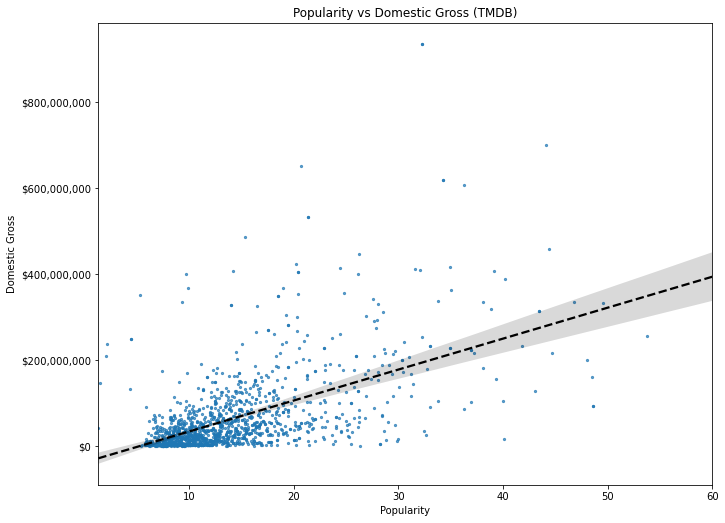

In [335]:
### TMDB SCATTERPLOT
#Now to create plots that visualize the relationship between ratings or popularity (x axis) 
# and domestic_gross (y-axis)

#a sns scatterplot will be best in this situation
#x-variable for ease of use
popularity = bojo_tmdb['popularity']
domestic_gross = bojo_tmdb['domestic_gross']

#pallete preparation
#sns.color_palette(palette='viridis', n_colors=25, as_cmap=True)

dict(color='black', ls='--')
ax1 = sns.regplot(y=domestic_gross, x=popularity, marker='o',
                  line_kws= {'color': 'black', 'ls': '--'}, scatter_kws= dict(alpha=0.7, s=5))
#color palletes i like: 'viridis'

ax1.get_figure().set_size_inches((11, 8.5))
ax1.set_xlabel('Popularity')
ax1.set_ylabel('Domestic Gross')
ax1.set_xlim(right=60)
ax1.yaxis.set_major_formatter("${x:,.0f}")
#ax1.yaxis.set_minor_formatter("{y:,.2f}")
ax1.set_title("Popularity vs Domestic Gross (TMDB)");

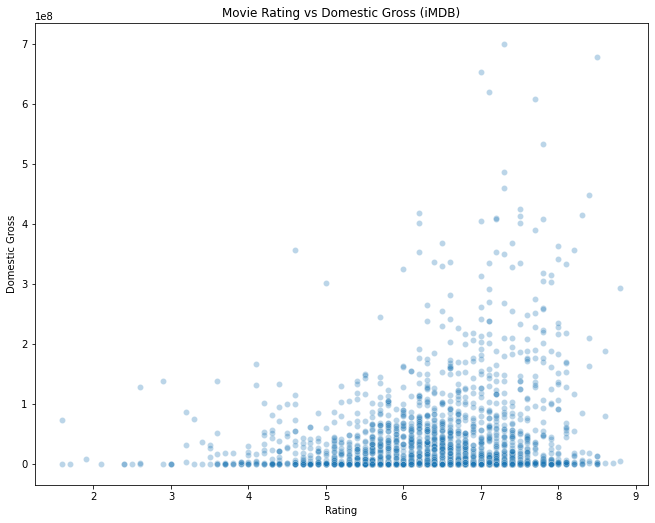

In [328]:
###IMDB SCATTERPLOT
rating = bojo_imdb['averagerating']
domestic_gross = bojo_imdb['domestic_gross']

#pallete preparation
#sns.color_palette(palette='viridis', n_colors=25, as_cmap=True)

ax2 = sns.scatterplot(y=domestic_gross, x=rating, alpha=(0.3))
#color palletes i like: 'viridis'

ax2.get_figure().set_size_inches((11, 8.5))
ax2.set_xlabel('Rating')
ax2.set_ylabel('Domestic Gross')
#ax1.xaxis.set_major_formatter("{x:,.2f}")
#ax2.yaxis.set_minor_formatter("{y:,.2f}")
ax2.set_title("Movie Rating vs Domestic Gross (iMDB)");

# Objective #3: What are the most popular movies currently? And during 2020-2021?

In [295]:
#For this objective, I am going to be doing an api search using https://imdb-api.com/.

#importing relevant modules 
import requests


In [296]:
#Acquiring the most popular movies DB
r = requests.get("https://imdb-api.com/en/API/MostPopularMovies/k_4k2gioan")
r.status_code

200

In [297]:
response = r.json()
response.keys()

dict_keys(['items', 'errorMessage'])

In [298]:
#Includes top 100 movies
len(response['items'])

data_list = response['items']
column_names = list(data_list[0].keys())
column_names

['id',
 'rank',
 'rankUpDown',
 'title',
 'fullTitle',
 'year',
 'image',
 'crew',
 'imDbRating',
 'imDbRatingCount']

In [299]:
#transforming file into pandas df
most_popular_df = pd.DataFrame(data=data_list, columns=column_names)
most_popular_df.head(25)

,id,rank,rankUpDown,title,fullTitle,year,image,crew,imDbRating,imDbRatingCount
0,tt1160419,1,0,Dune,Dune (2021),2021,https://imdb-api.com/images/original/MV5BN2FjN...,"Denis Villeneuve (dir.), Timothée Chalamet, Re...",8.2,257741
1,tt0087182,2,+4,Dune,Dune (1984),1984,https://imdb-api.com/images/original/MV5BYTAzY...,"David Lynch (dir.), Kyle MacLachlan, Virginia ...",6.4,148082
2,tt9032400,3,+6,Eternals,Eternals (2021),2021,https://imdb-api.com/images/original/MV5BMTExZ...,"Chloé Zhao (dir.), Gemma Chan, Richard Madden",,0
3,tt2382320,4,0,No Time to Die,No Time to Die (2021),2021,https://imdb-api.com/images/original/MV5BYWQ2N...,"Cary Joji Fukunaga (dir.), Daniel Craig, Ana d...",7.5,140906
4,tt10665338,5,-2,Halloween Kills,Halloween Kills (2021),2021,https://imdb-api.com/images/original/MV5BM2RmM...,"David Gordon Green (dir.), Jamie Lee Curtis, J...",5.7,49588
5,tt8847712,6,+8,The French Dispatch,The French Dispatch (2021),2021,https://imdb-api.com/images/original/MV5BNmQxZ...,"Wes Anderson (dir.), Benicio Del Toro, Adrien ...",7.5,12149
6,tt9639470,7,+17,Last Night in Soho,Last Night in Soho (2021),2021,https://imdb-api.com/images/original/MV5BZjgwZ...,"Edgar Wright (dir.), Thomasin McKenzie, Anya T...",7.6,10011
7,tt4244994,8,-3,The Last Duel,The Last Duel (2021),2021,https://imdb-api.com/images/original/MV5BZGExZ...,"Ridley Scott (dir.), Matt Damon, Adam Driver",7.7,18603
8,tt10298810,9,"2,197",Lightyear,Lightyear (2022),2022,https://imdb-api.com/images/original/MV5BYWM5Z...,"Angus MacLane (dir.), Chris Evans",,0
9,tt10763820,10,+2,Night Teeth,Night Teeth (2021),2021,https://imdb-api.com/images/original/MV5BNDhmO...,"Adam Randall (dir.), Jorge Lendeborg Jr., Debb...",5.6,9871


In [300]:
r2 = requests.get("https://imdb-api.com/en/API/BoxOfficeAllTime/k_4k2gioan")
r2.status_code

200

In [301]:
response2 = r2.json()
response2.keys()

response2['items']

[{'id': 'tt0499549',
  'rank': '1',
  'title': 'Avatar',
  'worldwideLifetimeGross': '$2,847,246,203',
  'domesticLifetimeGross': '$760,507,625',
  'domestic': '26.7%',
  'foreignLifetimeGross': '$2,086,738,578',
  'foreign': '73.3%',
  'year': '2009'},
 {'id': 'tt4154796',
  'rank': '2',
  'title': 'Avengers: Endgame',
  'worldwideLifetimeGross': '$2,797,501,328',
  'domesticLifetimeGross': '$858,373,000',
  'domestic': '30.7%',
  'foreignLifetimeGross': '$1,939,128,328',
  'foreign': '69.3%',
  'year': '2019'},
 {'id': 'tt0120338',
  'rank': '3',
  'title': 'Titanic',
  'worldwideLifetimeGross': '$2,201,647,264',
  'domesticLifetimeGross': '$659,363,944',
  'domestic': '30%',
  'foreignLifetimeGross': '$1,542,283,320',
  'foreign': '70%',
  'year': '1997'},
 {'id': 'tt2488496',
  'rank': '4',
  'title': 'Star Wars: Episode VII - The Force Awakens',
  'worldwideLifetimeGross': '$2,069,521,700',
  'domesticLifetimeGross': '$936,662,225',
  'domestic': '45.3%',
  'foreignLifetimeGross':

In [302]:
#includes top 100 grossing movies of all time
len(response2['items'])

data_list2 = response2['items']
column_names2 = list(data_list2[0].keys())
column_names2

['id',
 'rank',
 'title',
 'worldwideLifetimeGross',
 'domesticLifetimeGross',
 'domestic',
 'foreignLifetimeGross',
 'foreign',
 'year']

In [114]:
top_grossing_df = pd.DataFrame(data=data_list2, columns=column_names2)
top_grossing_df.head(25)

,id,rank,title,worldwideLifetimeGross,domesticLifetimeGross,domestic,foreignLifetimeGross,foreign,year
0,tt0499549,1,Avatar,"$2,847,246,203","$760,507,625",26.7%,"$2,086,738,578",73.3%,2009
1,tt4154796,2,Avengers: Endgame,"$2,797,501,328","$858,373,000",30.7%,"$1,939,128,328",69.3%,2019
2,tt0120338,3,Titanic,"$2,201,647,264","$659,363,944",30%,"$1,542,283,320",70%,1997
3,tt2488496,4,Star Wars: Episode VII - The Force Awakens,"$2,069,521,700","$936,662,225",45.3%,"$1,132,859,475",54.7%,2015
4,tt4154756,5,Avengers: Infinity War,"$2,048,359,754","$678,815,482",33.1%,"$1,369,544,272",66.9%,2018
5,tt0369610,6,Jurassic World,"$1,670,516,444","$652,385,625",39%,"$1,018,130,819",61%,2015
6,tt6105098,7,The Lion King,"$1,667,635,327","$543,638,043",32.6%,"$1,123,997,284",67.4%,2019
7,tt0848228,8,The Avengers,"$1,518,815,515","$623,357,910",41%,"$895,457,605",59%,2012
8,tt2820852,9,Furious 7,"$1,515,341,399","$353,007,020",23.3%,"$1,162,334,379",76.7%,2015
9,tt4520988,10,Frozen II,"$1,450,026,933","$477,373,578",32.9%,"$972,653,355",67.1%,2019


# Objective #4: What are the top films of 2021? 

In [303]:
#Wnat to try to use webscraping to pull the info of the top films of 2021 using 
#Box Office MoJo

from bs4 import BeautifulSoup
import re
html_page = requests.get("https://www.boxofficemojo.com/year/2021/?ref_=bo_lnav_hm_shrt")

soup = BeautifulSoup(html_page.content, 'html.parser')


In [304]:
#finding relevant division and creating container
table = soup.find('div', id='table')

#seperates all the relevant rows with movie data from table headers
table_rows = table.findAll('tr')[1:]

#length outputs 200 items, which corresponds to the 200 items on the website
len(table_rows)

200

In [105]:
#Now to extract information from the first row to serve as a template for
#other rows 
table_rows[0]

<tr><td class="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column">1</td><td class="a-text-left mojo-field-type-release mojo-cell-wide"><a class="a-link-normal" href="/release/rl3490022913/?ref_=bo_yld_table_1">Shang-Chi and the Legend of the Ten Rings</a></td><td class="a-text-left mojo-field-type-genre hidden">-</td><td class="a-text-right mojo-field-type-money hidden">-</td><td class="a-text-right mojo-field-type-duration hidden">-</td><td class="a-text-right mojo-field-type-money mojo-estimatable">$221,356,951</td><td class="a-text-right mojo-field-type-positive_integer">4,300</td><td class="a-text-right mojo-field-type-money mojo-estimatable">$221,356,951</td><td class="a-text-left mojo-field-type-date a-nowrap">Sep 3</td><td class="a-text-left mojo-field-type-studio"><a class="a-link-normal" href="https://pro.imdb.com/company/co0226183/boxoffice/?view=releases&amp;ref_=mojo_yld_table_1&amp;rf=mojo_yld_table_1" rel="noopener" target="_blank">Walt D

In [305]:
#finding rank
rank = table_rows[0].find('td', class_="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column").text
rank

'1'

In [306]:
#finding title
title = table_rows[0].find('td', class_= "a-text-left mojo-field-type-release mojo-cell-wide").text
title

'Shang-Chi and the Legend of the Ten Rings'

In [307]:
#finding amount grossed
gross = table_rows[0].find('td', class_ = "a-text-right mojo-field-type-money mojo-estimatable").text
gross

'$222,889,137'

In [308]:
#finding release data
release_date = table_rows[0].find('td', class_ = "a-text-left mojo-field-type-date a-nowrap").text
release_date

'Sep 3'

In [309]:
#finding studio
studio =  table_rows[0].find('td',class_ = "a-text-left mojo-field-type-studio").text.strip()
studio

'Walt Disney Studios Motion Pictures'

In [310]:
def get_movie_data(movie_table):
    movie_data = []
    for row in movie_table:
        rank = row.find('td', class_="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column").text
        title = row.find('td', class_= "a-text-left mojo-field-type-release mojo-cell-wide").text
        gross = row.find('td', class_ = "a-text-right mojo-field-type-money mojo-estimatable").text
        release_date = row.find('td', class_ = "a-text-left mojo-field-type-date a-nowrap").text
        studio = row.find('td',class_ = "a-text-left mojo-field-type-studio").text.strip()
        
        movie_data.append({'Rank': rank, 'Title': title, 'Gross': gross, 
                           'Release Date': release_date, 'Studio': studio})
    return movie_data

In [311]:
movie_data = get_movie_data(table_rows)

In [312]:
rankings_df = pd.DataFrame(movie_data)

In [318]:
#Creating money_cleaner function to remove '$', ',', and convert to integer for
#easier analysis
def money_cleaner(df, column_name, new_col_name):
    df[new_col_name] = df[column_name].map(lambda x: x.replace('$', ''))
    df[new_col_name] = df[new_col_name].map(lambda x: x.replace(',', ''))
    df[new_col_name] = pd.to_numeric(df[new_col_name])
    
    return df[new_col_name]

In [320]:
#applying money_cleaner function to gross column
gross_clean = money_cleaner(rankings_df, 'Gross', 'Gross_Clean')

#adds column to existing df
rankings_df['Gross_Clean'] = gross_clean
rankings_df.head()

,Rank,Title,Gross,Release Date,Studio,Gross_Clean
0,1,Shang-Chi and the Legend of the Ten Rings,"$222,889,137",Sep 3,Walt Disney Studios Motion Pictures,222889137
1,2,Venom: Let There Be Carnage,"$191,000,953",Oct 1,Sony Pictures Entertainment (SPE),191000953
2,3,Black Widow,"$183,651,655",Jul 9,Walt Disney Studios Motion Pictures,183651655
3,4,F9: The Fast Saga,"$173,005,945",Jun 25,Universal Pictures,173005945
4,5,A Quiet Place Part II,"$160,072,261",May 28,Paramount Pictures,160072261


In [321]:
rankings_df[:25]

,Rank,Title,Gross,Release Date,Studio,Gross_Clean
0,1,Shang-Chi and the Legend of the Ten Rings,"$222,889,137",Sep 3,Walt Disney Studios Motion Pictures,222889137
1,2,Venom: Let There Be Carnage,"$191,000,953",Oct 1,Sony Pictures Entertainment (SPE),191000953
2,3,Black Widow,"$183,651,655",Jul 9,Walt Disney Studios Motion Pictures,183651655
3,4,F9: The Fast Saga,"$173,005,945",Jun 25,Universal Pictures,173005945
4,5,A Quiet Place Part II,"$160,072,261",May 28,Paramount Pictures,160072261
5,6,No Time to Die,"$134,111,451",Oct 8,Metro-Goldwyn-Mayer (MGM),134111451
6,7,Free Guy,"$121,399,463",Aug 13,20th Century Studios,121399463
7,8,Jungle Cruise,"$116,901,135",Jul 30,Walt Disney Studios Motion Pictures,116901135
8,9,Godzilla vs. Kong,"$99,244,744",Mar 31,Warner Bros.,99244744
9,10,Halloween Kills,"$86,348,210",Oct 15,Universal Pictures,86348210


# Objective #5: Which studios have been the most successful in 2021? How much have the grossed? 

In [227]:
#sorts by the studio name and then sums the values of total gross per studio
studio_gross = rankings_df.groupby('Studio').sum('Gross_Clean').sort_values(by='Gross_Clean', ascending=False)

#creates new df of the top 10 grossing studios 
top_10_gross = studio_gross[:10]

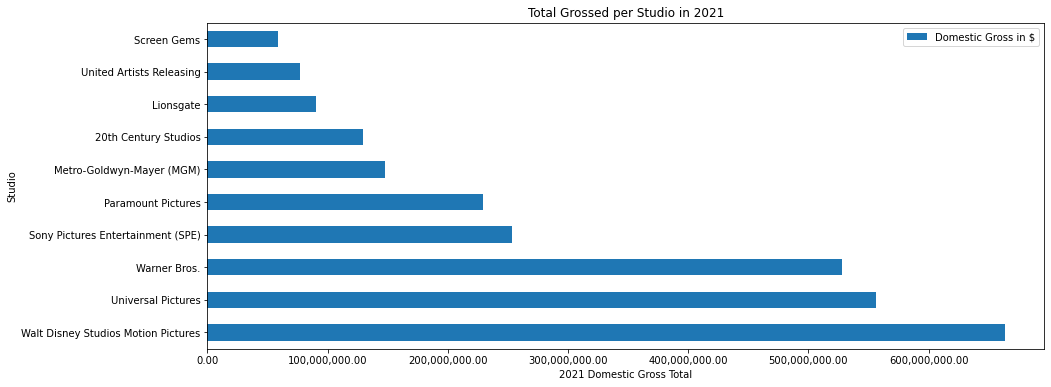

In [279]:
#Creates horizontal bargraph visualiation

ax = studio_gross[:10].plot(kind='barh', figsize=(15, 6))
ax.set_xlabel('2021 Domestic Gross Total')
ax.xaxis.set_major_formatter("{x:,.2f}")
ax.legend(['Domestic Gross in $'], loc='upper right')
ax.set_title('Total Grossed per Studio in 2021');

# Objective 5: What is the average budget of top movies?

In [322]:
#Uploads data about movie budgets
df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [323]:
#Uses money cleaner function to clean data for statistical analysis
budget_clean = money_cleaner(df, 'production_budget', 'budget_clean')
df['budget_clean'] = budget_clean

worldwide_gross = money_cleaner(df, 'worldwide_gross', 'ww_gross_clean')
df['ww_gross_clean'] = worldwide_gross
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_clean,ww_gross_clean
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000,1316721747


In [324]:
df['production_profit'] = df.ww_gross_clean - df.budget_clean


In [325]:
df.sort_values(by='production_profit', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_clean,ww_gross_clean,production_profit
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944","$2,208,208,395",200000000,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",306000000,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215000000,1648854864,1433854864
...,...,...,...,...,...,...,...,...,...
352,53,"Apr 27, 2001",Town & Country,"$105,000,000","$6,712,451","$10,364,769",105000000,10364769,-94635231
341,42,"Jun 14, 2019",Men in Black: International,"$110,000,000","$3,100,000","$3,100,000",110000000,3100000,-106900000
193,94,"Mar 11, 2011",Mars Needs Moms,"$150,000,000","$21,392,758","$39,549,758",150000000,39549758,-110450242
194,95,"Dec 31, 2020",Moonfall,"$150,000,000",$0,$0,150000000,0,-150000000


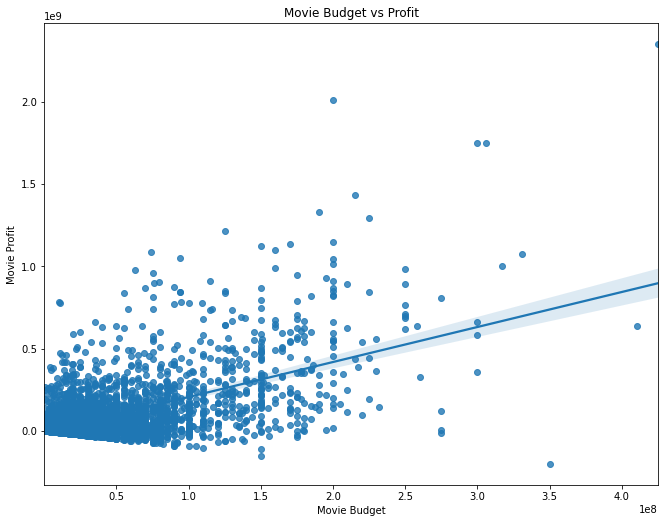

In [284]:
#Creates visual to see if there is a correlation between budget and profit. 
# Will movies with higher budgets have higher profits as well?

budget = df['budget_clean']
profit = df['production_profit']


ax = sns.regplot(x=budget, y=profit)


ax.get_figure().set_size_inches((11, 8.5))
ax.set_xlabel('Movie Budget')
ax.set_ylabel('Movie Profit')
#ax1.xaxis.set_major_formatter("{x:,.2f}")
#ax2.yaxis.set_minor_formatter("{y:,.2f}")
ax.set_title("Movie Budget vs Profit");

In [398]:
animation = [False, False, False, False, False, False, False, True, True, True,
            False, True, False, False, False, False, False, False, False, True,
            False, True, True, True, True, False, True, False, True, False, 
            False, False, True, False, True, False, False, False, True, False, 
             False, False, False, False, False, True, False, False, False, False,
            False, False, True, False, True, False, True, False, False, False,
            False, False, False, False, False, False, False, True, False, False,
            False, False, True, False, False, True, True, False, False, False,
            False, True, False, True, False, False, True, False, False, True,
            False, True, False, True, False, True, True, False, True, False]

len(animation)

100